# Intro to Machine Learning (based on Python Data Science)

## Basic Workflow

In [1]:
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\jmcketney.AD\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


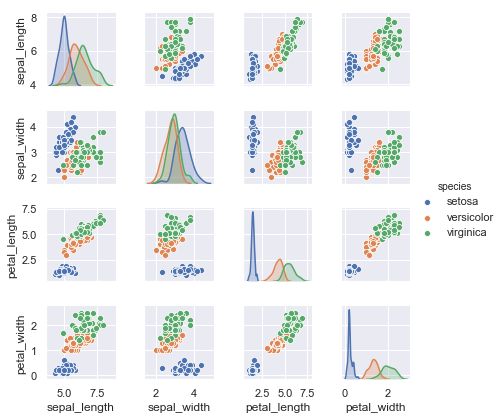

In [4]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue = 'species', height = 1.5)

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

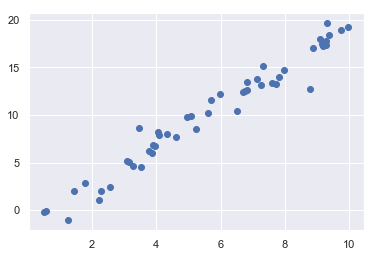

In [8]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(50)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)


In [9]:
rng2 = np.random.RandomState(5)
print(rng2.rand(10))

[0.22199317 0.87073231 0.20671916 0.91861091 0.48841119 0.61174386
 0.76590786 0.51841799 0.2968005  0.18772123]


In [10]:
##Testing linear regression needs to be imported from the sklearn.linear_model library
from sklearn.linear_model import LinearRegression

In [11]:
##Defining the the model as linear regression with a fit intercept, a hyperparameter
model= LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
X = x[:, np.newaxis]
X.shape


(50, 1)

In [13]:
##Applying our defined model to our x, y data

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
##Model parameters always end with a trailing underscore
model.coef_

array([2.09046825])

In [15]:
model.intercept_

-1.6248514389700013

In [16]:
##New values with which to test the models prediction ability
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

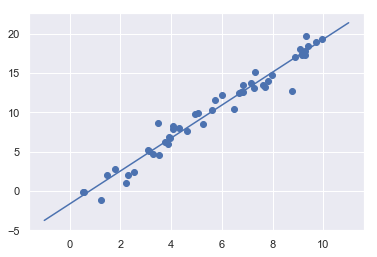

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

## Supervised example using naive bayes gaussian

In [18]:
##Will valdiate with Naive Bayes because fast and no hyperparameters good for testing conceptual viability
##random state variable is synonmous with the set.seed variable in R
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)


In [19]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to TRAINING data
y_model = model.predict(Xtest)             # 4. Use/test model on different set of data

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Unsupervised example using value decomposition


In [21]:
from sklearn.decomposition import PCA   # 1. choose model class
model = PCA(n_components = 2)           # 2. instantiate model
model.fit(X_iris)                       # 3. fit model to TRAINING data
X_2D = model.transform(X_iris)          # 4. Use/test model on different set of data

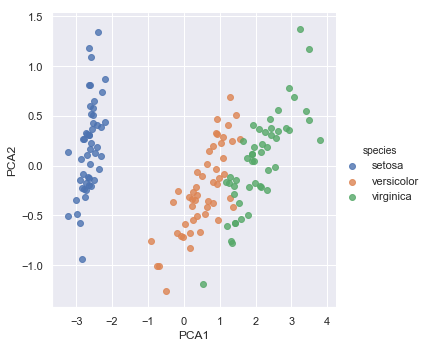

In [22]:
##Plotting the two PCA components generated above
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1","PCA2", hue = 'species', data = iris, fit_reg=False);

In [26]:
##Now trying unsupervised clustering using a Gaussian mixed model

from sklearn.mixture import GaussianMixture                      #Choose model class
model = GaussianMixture(n_components=3, covariance_type = 'full') #Choose hyperparameters and instantiate
model.fit(X_iris)                                                 #Fit to training data
y_gmm = model.predict(X_iris)                                     #Use to predict values for other data  

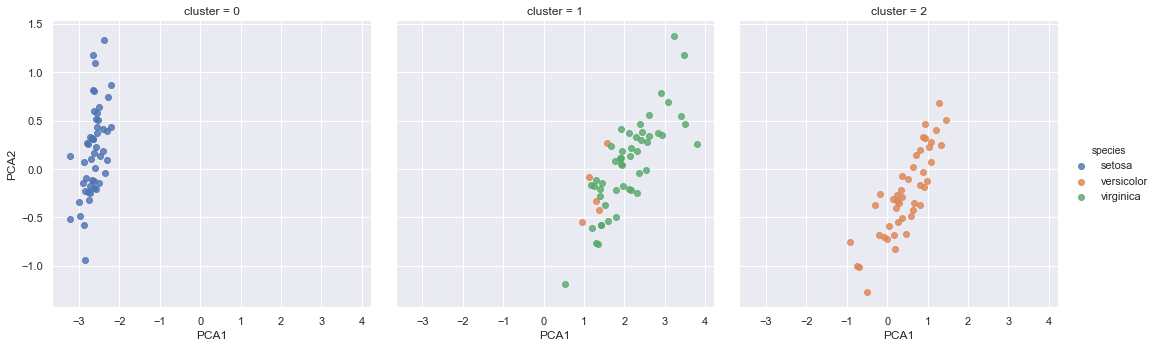

In [27]:
#Plot the model fit data
iris['cluster'] = y_gmm  #Assigns the model prediction output to a variable in iris called cluster
sns.lmplot("PCA1","PCA2", data=iris, hue = 'species', col = 'cluster', fit_reg=False);  #col must be specifying the columns are by cluster

## Cool Application:Handwritten Digits

In [62]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape   ##1797 element array of 8 by 8 pixel boxes

(1797, 8, 8)

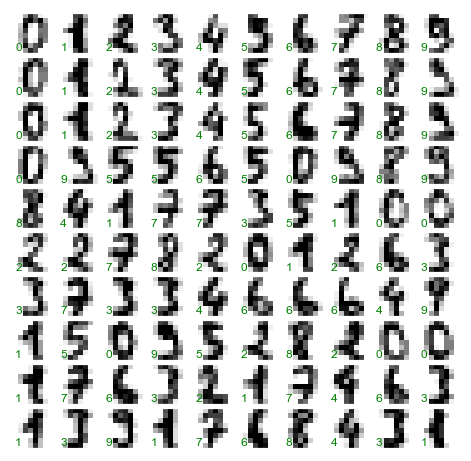

In [63]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8,8), 
                        subplot_kw={'xticks':[], 'yticks':[]}, 
                        gridspec_kw = dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

### Treat each pixel in image as feature
#### Then flatten out array so we have length-64 array of features

In [64]:
X = digits.data
X.shape

(1797, 64)

In [65]:
y = digits.target
y.shape

(1797,)

In [72]:
## Lets reduce the data to two dimensions for visualization

from sklearn.manifold import Isomap      #Choose and import the model class
iso = Isomap(n_components=2)             #Instantiate the model with the hyperparameters
iso.fit(digits.data)                     #Fit the model to known/training data
data_projected = iso.transform(digits.data)  #Apply the model to new data
data_projected.shape
colors = np.random.rand(1797)

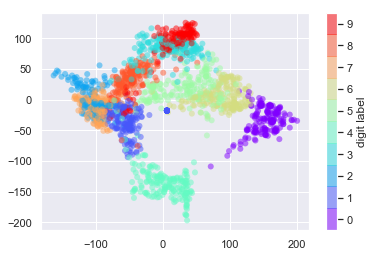

In [85]:
import numpy as np

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,           #x is pca1(all rows,col1), and y is pca2(all rows, col2)
           edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.colorbar(label='digit label', ticks=range(10))                            #adds a legend indicating which color relates to which number digit
plt.clim(-0.5,9.5);

In [69]:
#Very confused on why that plot won't color itself correctly

##Figured it out, the problem was that I made the range in my clim too small the colors were limited to -0.5 to 0.5
import collections, numpy

collections.Counter(digits.target)



Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

### Now we will try to classify the handwritten digits

In [70]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [71]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

### Confustion Matrix provides insight on where model went wrong

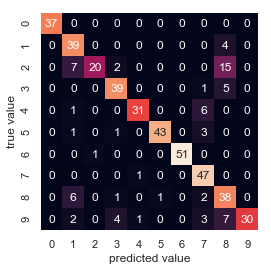

In [77]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');        #like the hardware store ahahahah


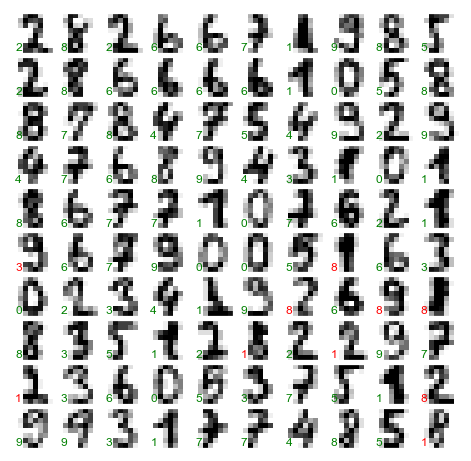

In [80]:
fig, axes = plt.subplots(10, 10, figsize=(8,8), 
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1,8,8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')

# Hyperparameters and Validation

### Example of incorrect validation strategy

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)     #instantiate model with necessary hyperparameters

In [3]:
model.fit(X, y)                    #Fit  the model to the training data
y_model = model.predict(X)        #predict new data labels from trained model

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)                    #result is a perfect score because trained and evaluated on the same data

1.0

### Need to holdout some data to validate your model

In [5]:
from sklearn.cross_validation import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, random_state = 0, train_size = 0.5)

model.fit(X1, y1)

y2_model = model.predict(X2)
accuracy_score(y2_model, y2)

0.9066666666666666

#### If wanted to do cross validation on two data sets:

In [7]:
#two fold cross validation
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [8]:
from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [9]:
#Can do cross validation n-fold where n is the number of samples
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
scores.mean()


0.96

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [13]:
import numpy as np
##GOTTA FIGURE OUT WHAT THIS FUNCTION IS DOING
def make_data(N, err=1.0, rseed=1):
    #randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)